# Background blurring using single image

In [2]:
# System imports
from os import path
import math

# Third-Party Imports
import cv2
import matplotlib.pyplot as plt
import numpy as np

# modify to where you store your project data including utils
datadir = "./" 

# utilfn = datadir + "utils"
# !cp -r "$utilfn" .
# samplesfn = datadir + "samples"
# !cp -r "$samplesfn" .

# can change this to your output directory of choice
!mkdir "images"
!mkdir "images/inputs"
!mkdir "images/outputs"

mkdir: images: File exists
mkdir: images/outputs: File exists


## Part 2: Background Blur using Depth Image

In [180]:
'''
  The given position will be clear
  The other regions will be blurred based on the depth map

  dimg: depth image
  cimg: color image
  pos: position of the object to be clear
  blur_lv: blur level

  return: blurred image
  '''
def blur_background(dimg, cimg, pos, blur_lv=5, step=1):
  assert dimg.shape == cimg.shape[:2]

  h,w = dimg.shape
  furthest = np.max(dimg)
  closest = np.min(dimg)
  focus_depth = dimg[pos[0], pos[1]]
  d = max(furthest - closest, focus_depth - closest) / (blur_lv-1)

  def calc_level(x):
    if x == focus_depth:
      return 0
    return int(abs(x - focus_depth) / d)
  
  blur = np.zeros((h,w), dtype=np.uint8)
  for i in range(h):
    for j in range(w):
      blur[i,j] = calc_level(dimg[i,j])

  # create multiple blurred images based on blur level
  blurred_imgs = [cimg.copy()]
  for i in range(blur_lv):
    kernel_size = 2 * step * i + 1
    blurred_imgs.append(cv2.GaussianBlur(cimg, (kernel_size, kernel_size), 0))

  # combine the blurred images based on the blur level at each pixel
  output = np.zeros((h,w,3))
  for i in range(h):
    for j in range(w):
      output[i,j] = blurred_imgs[blur[i,j]][i,j] / 255.0
      if (i,j) == (651,1120):
        print(blur[i,j])

  return (output, blurred_imgs)

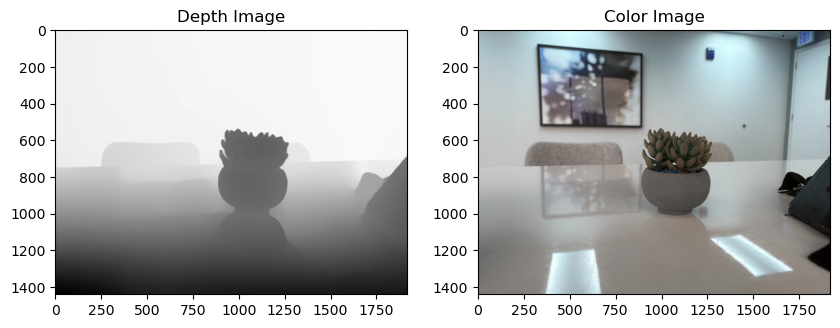

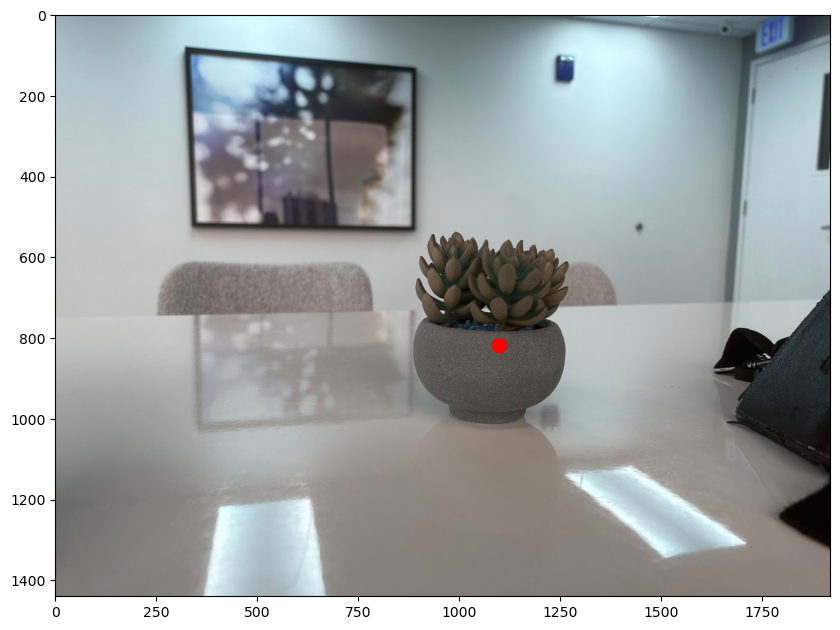

In [181]:
# read depth image
dimg = cv2.imread("images/inputs/d2.jpeg", cv2.IMREAD_ANYDEPTH)
# read color image
cimg = cv2.imread("images/inputs/c2.jpeg")
# cimg = cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB)
# invert depth image
dimg = np.max(dimg) - dimg

# parameters
position = (817,1100)
blur_lv = 10
step = 3

# show depth image
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(dimg, cmap='gray')
plt.title("Depth Image")
plt.subplot(1,2,2)
plt.imshow(cimg)
plt.title("Color Image")
plt.show()

# shoe focus position as an x
plt.figure(figsize=(10,10))
plt.imshow(cimg)
plt.scatter(position[1], position[0], c='r', s=100)
plt.show()

/var/folders/_4/jrywk3257gj69_jl701gh_q40000gn/T/ipykernel_61782/2737797781.py:24: RuntimeWarning: overflow encountered in scalar subtract
  return int(abs(x - focus_depth) / d)


8


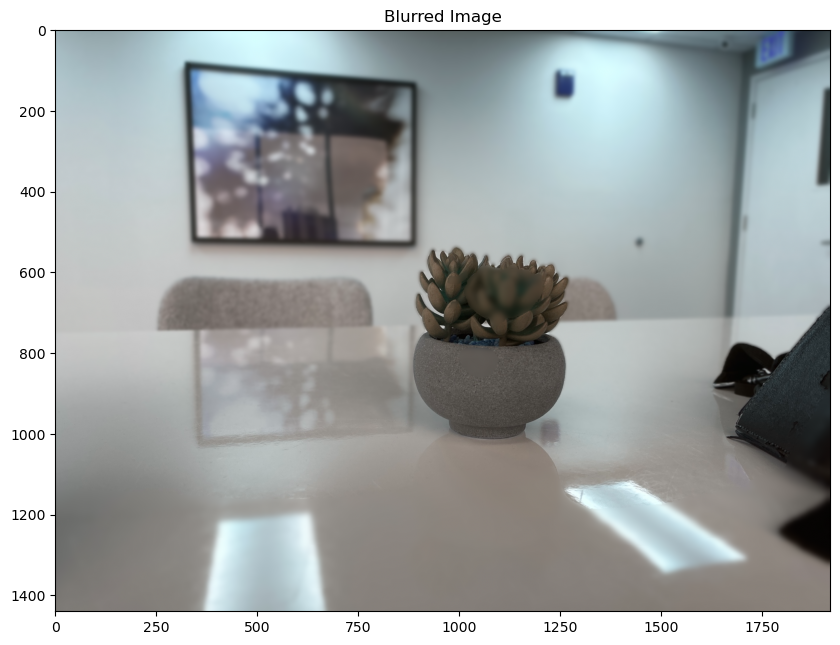

True

In [182]:
# (result, blurred_images) = blur_background(dimg, cimg, (100,500), blur_lv=10, step=3)
(result, blurred_images) = blur_background(dimg, cimg, position, blur_lv=blur_lv, step=step)
# show blurred image
plt.figure(figsize=(10,10))
plt.imshow(result)
plt.title("Blurred Image")
plt.show()

# # show blurred images
# plt.figure(figsize=(10,10))
# plt.subplot(1,2,1)
# plt.imshow(blurred_images[3])
# plt.title("Blurred Image 1")
# plt.subplot(1,2,2)
# plt.imshow(blurred_images[4])

# write blurred image
cv2.imwrite("images/outputs/blur.jpeg", result * 255.0)